<a href="https://colab.research.google.com/github/Juan-Draghi/relevamiento-boletin-oficial-argentina/blob/main/Busqueda_Boletin_Oficial_RA_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

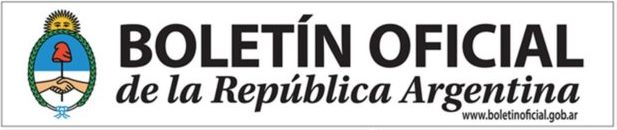

# 📄 Búsqueda de Términos Clave en el Boletín Oficial
Este notebook permite analizar el ejmplar del día del Boletín Oficial de la República Argentina, buscando un conjunto de términos clave relacionados con el ejercicio profesional de la arquitectura y el urbanismo.


In [ ]:
# 📦 Instalación de dependencias
!pip install pdfplumber openpyxl
!pip install tqdm
import requests

import logging
logging.getLogger("pdfminer").setLevel(logging.ERROR)


# URL del Boletín Oficial de la Nación (primera sección)
url_boletin_nacion = "https://s3.arsat.com.ar/cdn-bo-001/pdf-del-dia/primera.pdf"

# Descargar el PDF
response = requests.get(url_boletin_nacion)

if response.status_code != 200:
    raise Exception("No se pudo descargar el boletín desde la URL.")

# Guardarlo como archivo temporal
ruta_pdf_nacion = "/content/boletin_nacion.pdf"

with open(ruta_pdf_nacion, "wb") as f:
    f.write(response.content)

print("Boletín Nacional descargado correctamente.")

# Listado de la palabras clave

keywords = [
    "títulos de grado",
    "construcción",
    "arquitectura",
    "arquitectos",
    "arquitecto",
    "ejercicio profesional",
    "ejercicio de profesiones universitarias",
    "profesionales universitarios",
    "entidades profesionales",
    "matriculación",
    "honorarios profesionales",
    "arancel de honorarios",
    "Programa Nacional de Etiquetado de Viviendas",
    "PRONEV",
    "instalaciones sanitarias",
    "instalaciones de gas",
    "actividades profesionales reservadas exclusivamente al título",
    "actividades profesionales reservadas al título de arquitecto",
    "actividades profesionales reservadas al título",
    r"[Rr]esoluci[oó]n(?: (?:N[°º]|n[°º])\.?)? ?1254(?:/?2018)?",
    r"[Rr]esoluci[oó]n(?: (?:N[°º]|n[°º])\.?)? ?498(?:/?2006)?",
    r"[Dd]ecreto(?: (?:N[°º]|n[°º])\.?)? ?1099(?:/?(?:1984|84))?",
    r"[Dd]ecreto(?: (?:N[°º]|n[°º])\.?)? ?911(?:/?(?:1996|96))?",
    r"[Dd]ecreto(?: (?:N[°º]|n[°º])\.?)? ?2284(?:/?(?:1991|91))?",
    r"[Dd]ecreto(?: (?:N[°º]|n[°º])\.?)? ?2293(?:/?(?:1992|92))?",
    r"[Dd]ecreto[- ]?[Ll]ey(?: (?:N[°º]|n[°º])\.?)? ?6[.,]?070(?:/?(?:1958|58))?",
    r"[Dd]ecreto[- ]?[Ll]ey(?: (?:N[°º]|n[°º])\.?)? ?7[.,]?887(?:/?(?:1955|55))?"
]

# 🔍 Búsqueda de términos clave y exportación a Excel

import pdfplumber
import re
import pandas as pd
import io
from tqdm.notebook import tqdm

resultados = []

# # Detectar el archivo PDF
# pdf_file = next((f for f in uploaded if f.endswith('.pdf')), None)

with pdfplumber.open(ruta_pdf_nacion) as pdf:
    for i, page in enumerate(tqdm(pdf.pages, desc="Procesando páginas")):
        text = page.extract_text()
        if text:
            for term in keywords:
                matches = list(re.finditer(term, text, re.IGNORECASE))
                for m in matches:
                    start = max(m.start() - 150, 0)
                    end = m.end() + 150
                    context = text[start:end].replace('\n', ' ')
                    resultados.append({
                        "Página": i + 1,
                        "Término": term,
                        "Contexto": context
                    })

if len(resultados) == 0:
    print("No se encontraron coincidencias.")
else:
  # Exportar a archivo Excel
  df_resultados = pd.DataFrame(resultados)
  nombre_salida = "resultados_busqueda_BORA.xlsx"
  df_resultados.to_excel(nombre_salida, index=False)

  # Descargar archivo
  from google.colab import files
  files.download(nombre_salida)